In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import warnings
# %matplotlib inline
# warnings.filterwarnings('ignore')
#

In [2]:
# a = 7.97 * 10**-3
# b = 2.232 * 10**-35
# c = 3. * 10**10
# frame = pd.read_csv('refr.dat', sep='  ',header=0,names=['herz','n_complex'])
# frame['herz']*=10**12
#

In [3]:
# frame['w'] = 2*np.pi *frame['herz']
# frame['lambda'] = 2*np.pi*c/frame['w'] * 10**4
# frame['n_base'] = 1 + a + b*frame['w']**2
# frame['n_full'] = frame['n_base'] + frame['n_complex']
# arr1 = np.array(frame['w'])
# arr2 = arr1[1:-1:1]
# dw = np.abs(np.array(arr1[:-2] - arr2))
# dw_mean = np.mean(dw)
# frame['k'] = frame['w'] * frame['n_complex']/c
# k = np.array(frame['k'])
# k2 = np.zeros(shape=frame['w'].shape[0])
# for i in range(0,frame['w'].shape[0]-1):
#     k_help = (k[i-1] - 2*k[i] + k[i+1])/dw_mean**2
#     k2[i] = k_help
# frame['k'] = k2
#
#

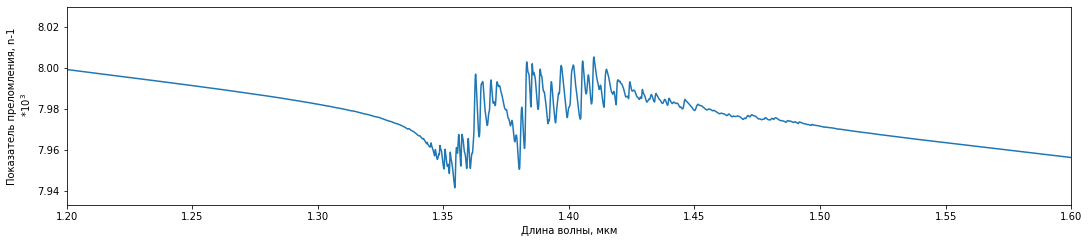

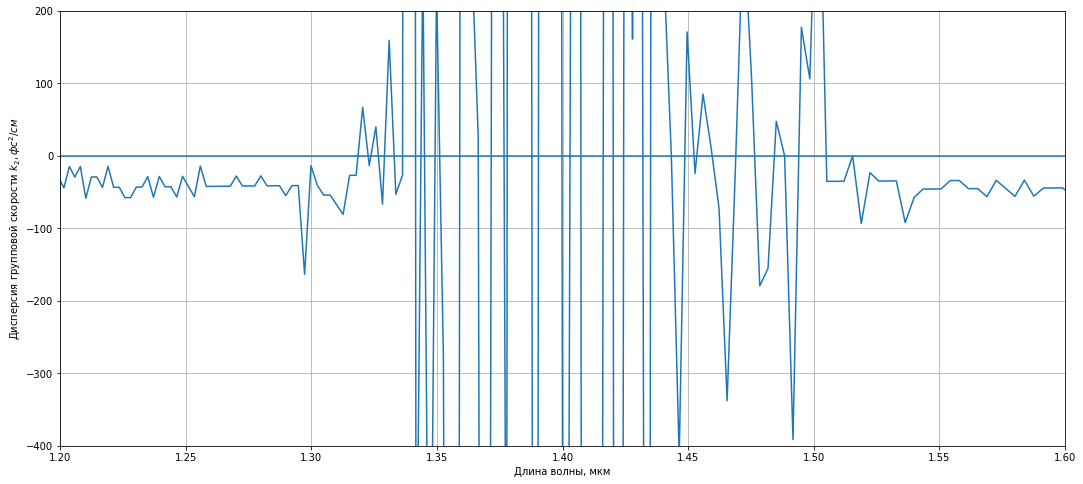

In [4]:
# plt.figure(figsize=(18,8))
# plt.subplot(212)
# plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
# plt.xlim(left=1.2,right=1.6)
# plt.xlabel('Длина волны, мкм')
# plt.ylabel('Показатель преломления, n-1\n $*10^3$')
#
# plt.subplot(212)
# step = 1500
# x = frame['lambda'][1:-1:step]
# const = 10**27
# plt.figure(figsize=(18,8))
# plt.plot(x,k2[1:-1:step]*const)
# plt.xlim(left=1.2,right=1.6)
# plt.ylim(bottom=-400,top=200)
# plt.hlines(0,1.2,1.6)
# plt.xlabel('Длина волны, мкм')
# plt.ylabel('Дисперсия групповой скорости $k_2 , фс^2/см $')
# plt.grid()
# plt.show()
#


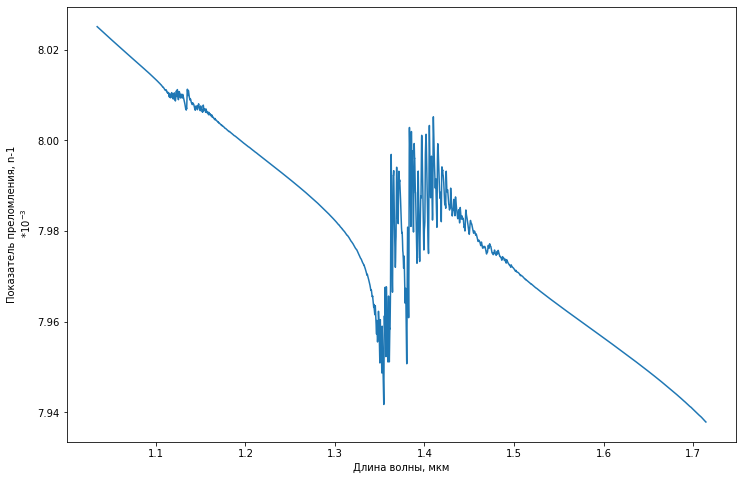

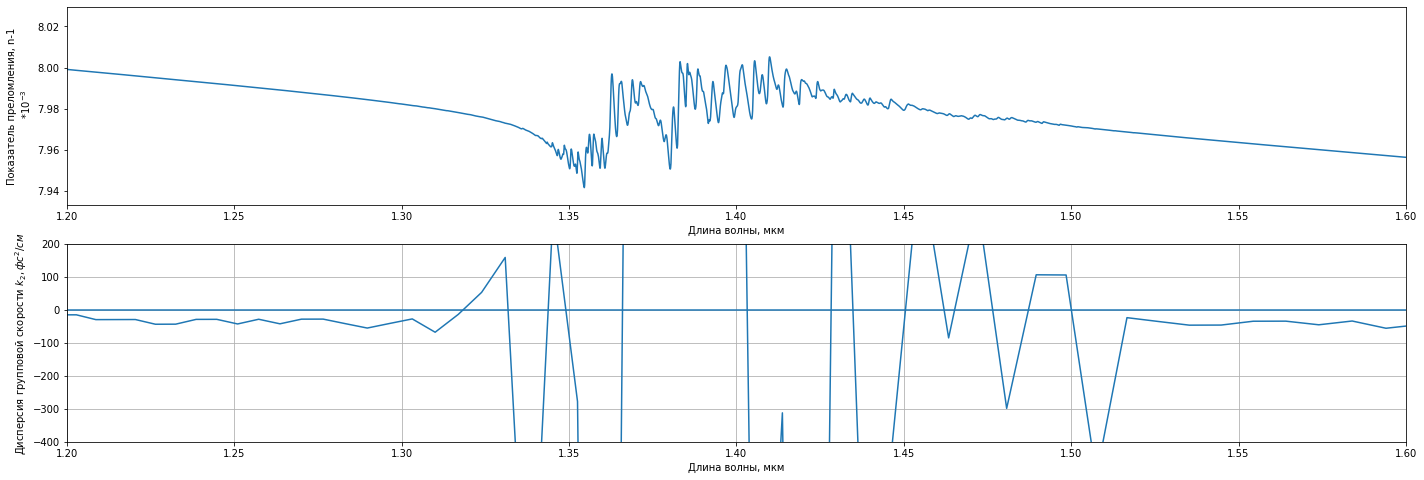

In [6]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
a = 7.97 * 10**-3
b = 2.232 * 10**-35
c = 3. * 10**10
frame = pd.read_csv('refr.dat', sep='  ',header=0,names=['herz','n_complex'])
frame['herz']*=10**12
frame['w'] = 2*np.pi *frame['herz']
frame['lambda'] = 2*np.pi*c/frame['w'] * 10**4
frame['n_base'] = 1 + a + b*frame['w']**2
frame['n_full'] = frame['n_base'] + frame['n_complex']
arr1 = np.array(frame['w'])
arr2 = arr1[1:-1:1]
dw = np.abs(np.array(arr1[:-2] - arr2))
dw_mean = np.mean(dw)
frame['k'] = frame['w'] * frame['n_full']/c
k = np.array(frame['k'])
k2 = np.zeros(shape=frame['w'].shape[0])
for i in range(0,frame['w'].shape[0]-1):
    k_help = (k[i-1] - 2*k[i] + k[i+1])/dw_mean**2
    k2[i] = k_help
frame['k2'] = k2


plt.figure(figsize=(12,8))
plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1\n $*10^{-3}$')
plt.show()
#@title

step = "4000" #@param {type:"string"}
step = int(step)
x = frame['lambda'][1:-1:step]



plt.figure(figsize=(24,8))
plt.subplot(211)
plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
plt.xlim(left=1.2,right=1.6)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1\n $*10^{-3}$')

plt.subplot(212)
# step = 1500
const = 10**27
# plt.figure(figsize=(18,8))
plt.plot(x,k2[1:-1:step]*const)
plt.xlim(left=1.2,right=1.6)
plt.ylim(bottom=-400,top=200)
plt.hlines(0,1.2,1.6)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Дисперсия групповой скорости $k_2 , фс^2/см $')
plt.grid()
plt.show()

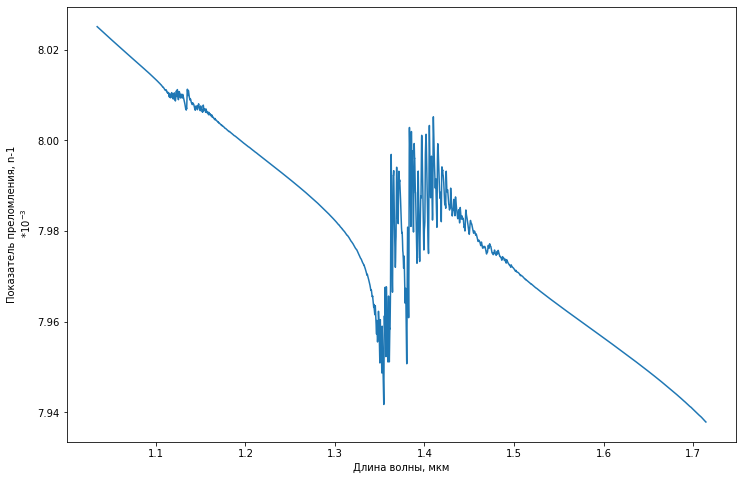

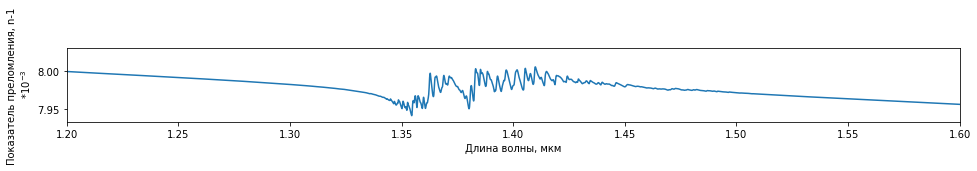

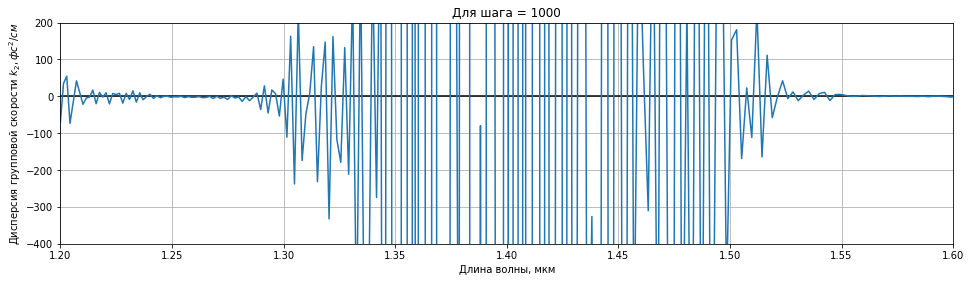

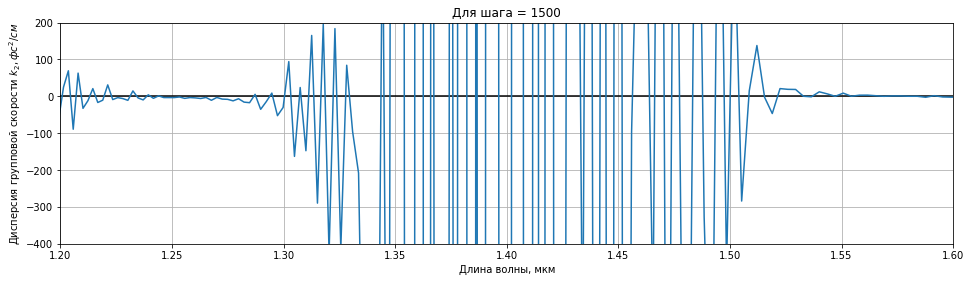

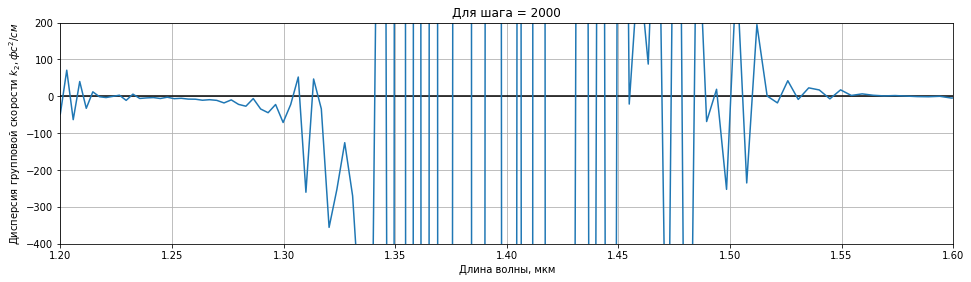

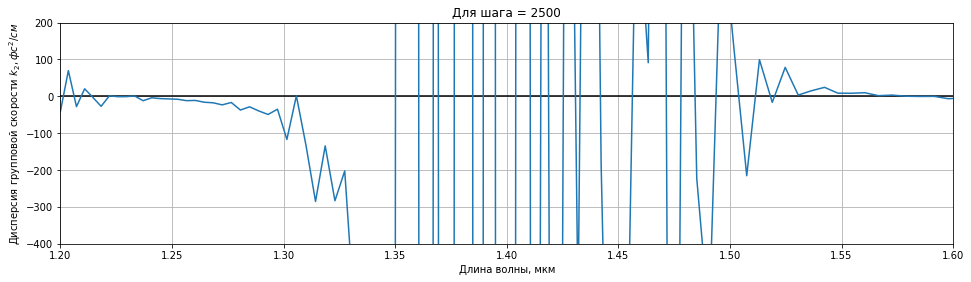

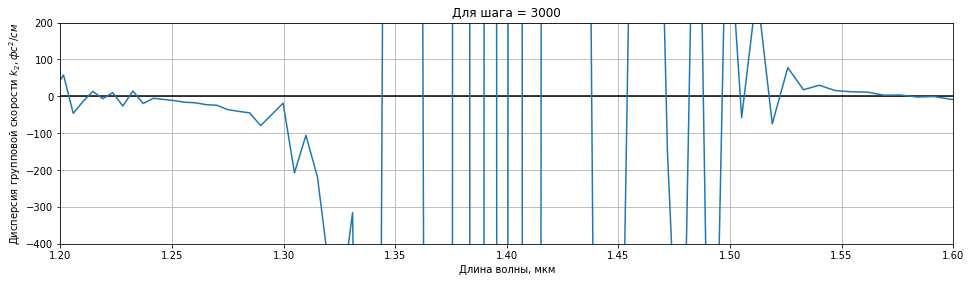

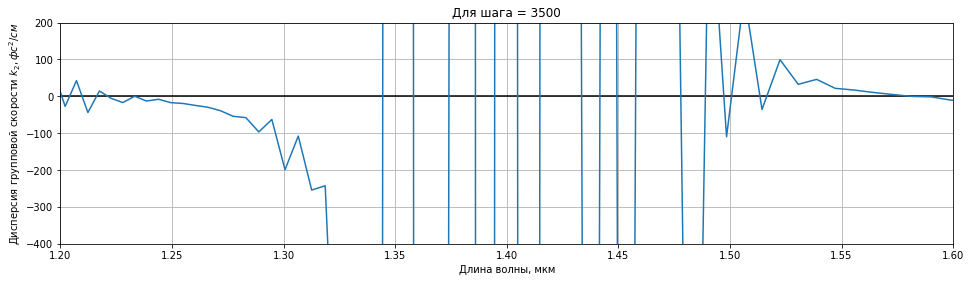

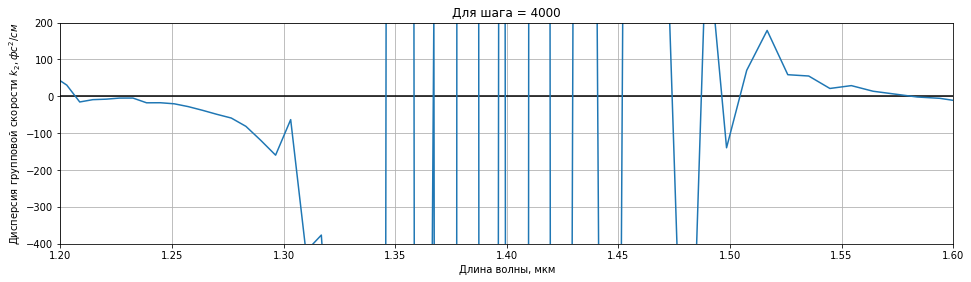

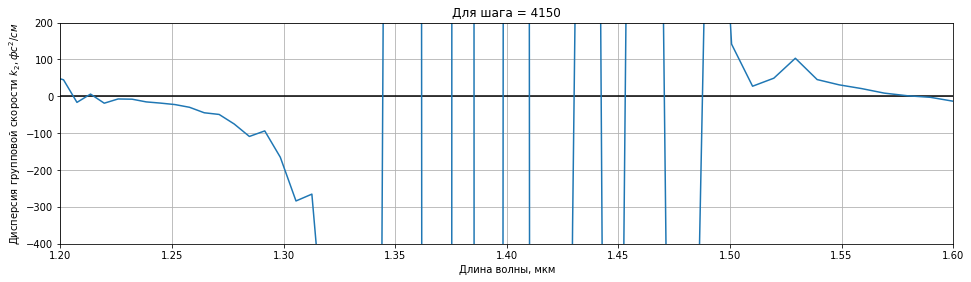

In [82]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
a = 7.97 * 10**-3
b = 2.232 * 10**-35
c = 3. * 10**10
step_d = [1000,1500,2000,2500,3000,3500,4000,4150]
frame = pd.read_csv('refr.dat', sep='  ',header=0,names=['herz','n_complex'])
frame['herz']*=10**12
frame['w'] = 2*np.pi *frame['herz']
frame['lambda'] = 2*np.pi*c/frame['w'] * 10**4
frame['n_base'] = 1 + a + b*frame['w']**2
frame['n_full'] = frame['n_base'] + frame['n_complex']
arr1 = np.array(frame['w'])
arr2 = arr1[1:-1:1]

frame['k'] = frame['w'] * frame['n_full']/c
plt.figure(figsize=(12,8))
plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1\n $*10^{-3}$')
plt.show()

plt.figure(figsize=(16,16))
plt.subplot(2+len(step_d),1,1)
plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
plt.xlim(left=1.2,right=1.6)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1\n $*10^{-3}$')
# plt.tight_layout(pad=15.0)
for n,step_w in enumerate(step_d):
    dw = np.abs(np.array(arr1[:-2:step_w] - arr2[::step_w]))
    dw_mean = np.mean(dw)
    k = np.array(frame['k'][::step_w])
    k2 = np.zeros(shape=k.shape[0])
    for i in range(k.shape[0]-1):
        k_help = (k[i-1] - 2*k[i] + k[i+1])/dw_mean**2
        k2[i] = k_help
    # frame['k2'] = k2



    #@title

    step = 1
    x = frame['lambda'][1:-1:step_w]
    plt.subplots(figsize = (16,48))

    plt.subplot(2+len(step_d),1,2+n)
    # step = 1500

    const = 10**23
    # plt.figure(figsize=(18,8))
    plt.plot(x[1:],k2[1:]*const)
    plt.xlim(left=1.2,right=1.6)
    plt.ylim(bottom=-400,top=200)
    plt.hlines(0,1.2,1.6,colors='black')
    plt.xlabel('Длина волны, мкм')
    plt.ylabel('Дисперсия групповой скорости $k_2 , фс^2/см $')
    plt.title(f'Для шага = {step_w}')
    plt.grid()
    # plt.axes([1,1,1,1])

    # print('\n')
plt.show()

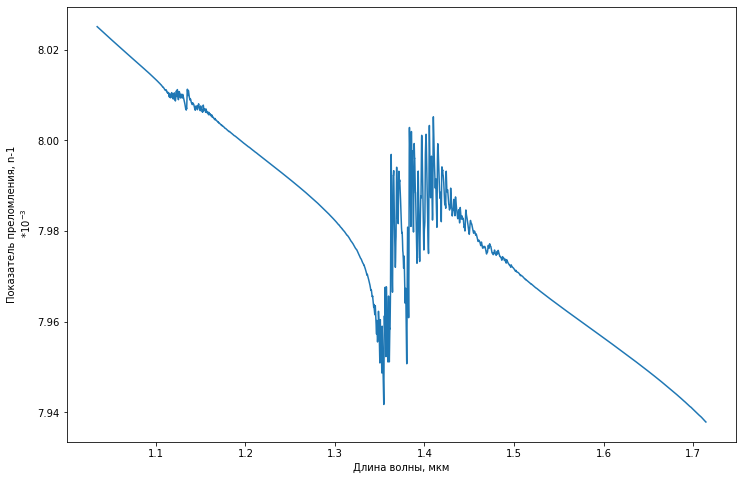

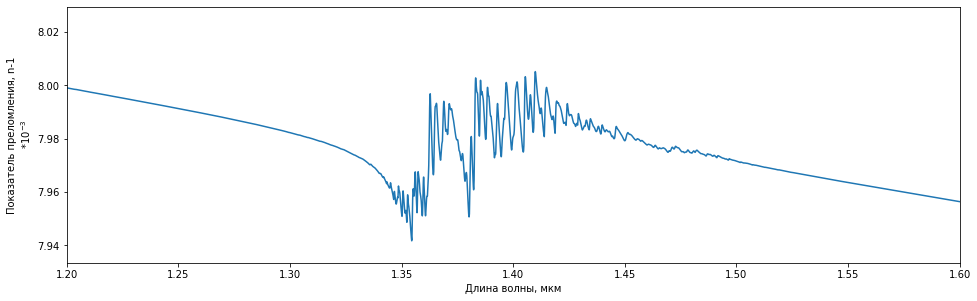

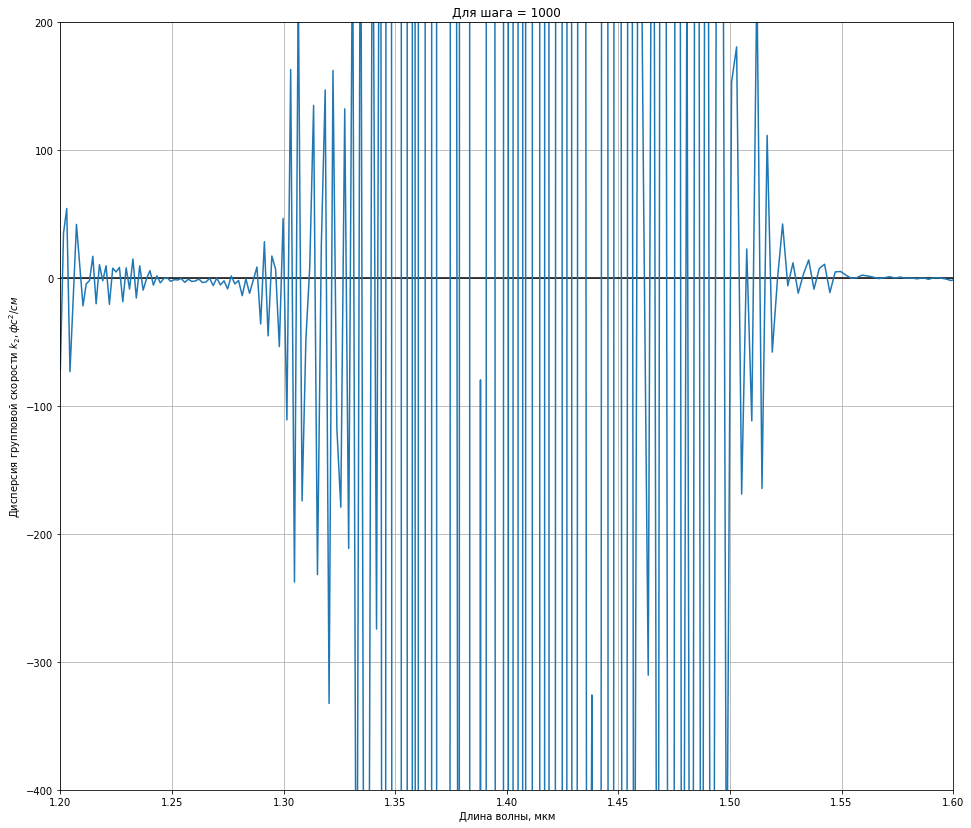

In [90]:
values = 100,1000
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
a = 7.97 * 10**-3
b = 2.232 * 10**-35
c = 3. * 10**10
filter = 1200
filter = [filter]
if filter == [1200]:
    step_d=filter
else:
    step_d = [1000,1500,2000,2500,3000,3500,4000,4150]
frame = pd.read_csv('refr.dat', sep='  ',header=0,names=['herz','n_complex'])
frame['herz']*=10**12
frame['w'] = 2*np.pi *frame['herz']
frame['lambda'] = 2*np.pi*c/frame['w'] * 10**4
frame['n_base'] = 1 + a + b*frame['w']**2
frame['n_full'] = frame['n_base'] + frame['n_complex']
arr1 = np.array(frame['w'])
arr2 = arr1[1:-1:1]

frame['k'] = frame['w'] * frame['n_full']/c
plt.figure(figsize=(12,8))
plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1\n $*10^{-3}$')
plt.show()

plt.figure(figsize=(16,16))
plt.subplot(2+len(step_d),1,1)
plt.plot(frame['lambda'],(frame['n_full']-1)*10**3)
plt.xlim(left=1.2,right=1.6)
plt.xlabel('Длина волны, мкм')
plt.ylabel('Показатель преломления, n-1\n $*10^{-3}$')
# plt.tight_layout(pad=15.0)
for n,step_w in enumerate(step_d):
    dw = np.abs(np.array(arr1[:-2:step_w] - arr2[::step_w]))
    dw_mean = np.mean(dw)
    k = np.array(frame['k'][::step_w])
    k2 = np.zeros(shape=k.shape[0])
    for i in range(k.shape[0]-1):
        k_help = (k[i-1] - 2*k[i] + k[i+1])/dw_mean**2
        k2[i] = k_help
    # frame['k2'] = k2



    #@title

    step = 1
    x = frame['lambda'][1:-1:step_w]
    plt.subplots(figsize = (16,48))

    plt.subplot(2+len(step_d),1,2+n)
    # step = 1500

    const = 10**23
    # plt.figure(figsize=(18,8))
    plt.plot(x[1:],k2[1:]*const)
    plt.xlim(left=1.2,right=1.6)
    plt.ylim(bottom=-400,top=200)
    plt.hlines(0,1.2,1.6,colors='black')
    plt.xlabel('Длина волны, мкм')
    plt.ylabel('Дисперсия групповой скорости $k_2 , фс^2/см $')
    plt.title(f'Для шага = {step_w}')
    plt.grid()
    # plt.axes([1,1,1,1])

    # print('\n')
plt.show()


In [89]:
filter == [1]

True

In [91]:
values = 100,1000

In [93]:
values = list(values)

In [96]:
value = 1
type(value) == int

True